# Fandango Project
## Overview

When considering going out to watch a movie, how reliable are online reviews and ratings? Particularly when the platform displaying the ratings also profits from ticket sales. Is there a tendency for such companies to inflate ratings to encourage ticket purchases?

### Goal:

**My goal is to find out does the company makes higher movie ratings just to sell higher
amount of the tickets.** 

---
---

## Understanding the Background and Data


**For a better understanding of my motivation for making this project, read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**


### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data.

----
----

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

## Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**TASK: Opening fandango_scrape.csv file**

In [2]:
fandango = pd.read_csv("fandango_scrape.csv")

In [3]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


In [10]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [11]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: I want to explore the relationship between popularity of a film and its rating.**

In [12]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


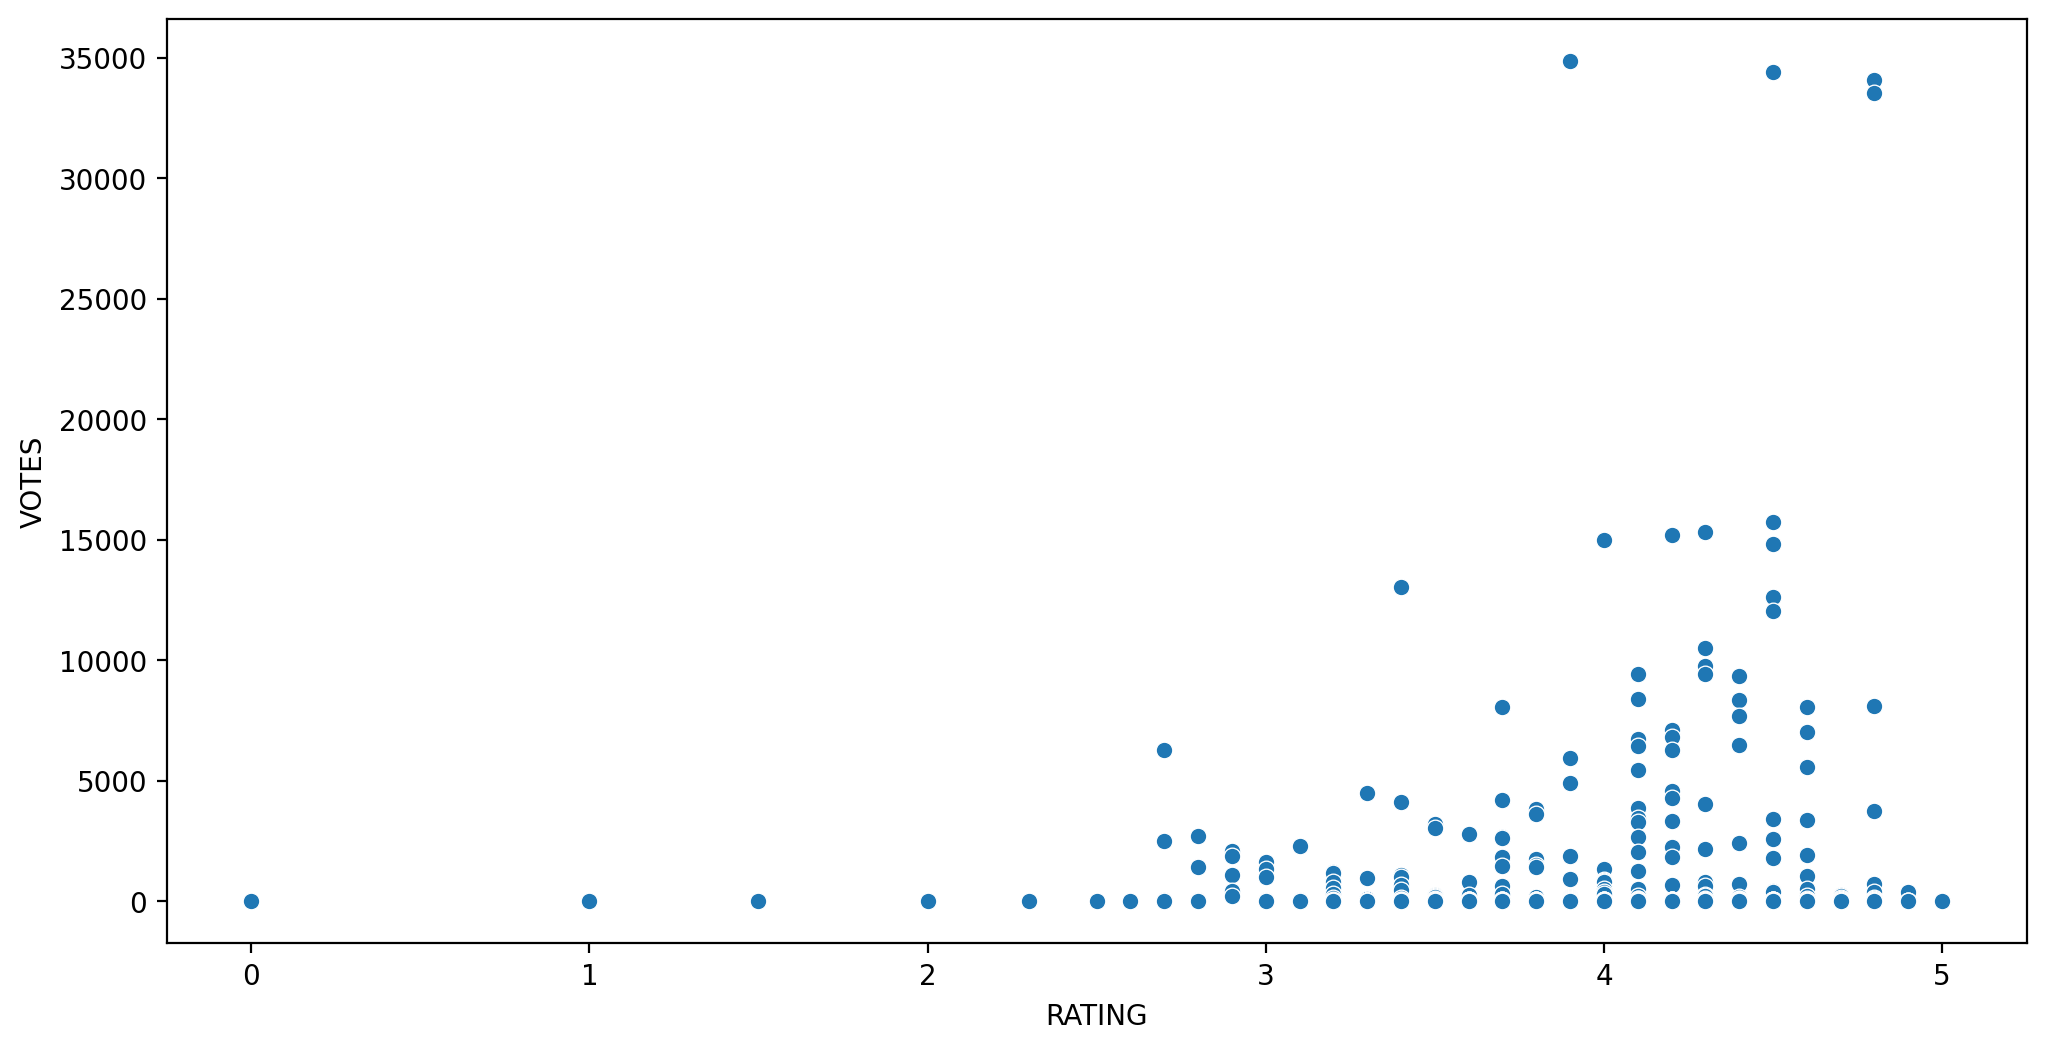

In [19]:
plt.figure(figsize = (12, 6), dpi = 200)
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES');

**TASK: Calculating the correlation between the columns:**

In [27]:
correlation = fandango.drop('FILM', axis = 1)
correlation.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**I am going to create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [41]:
fandango['YEAR'] = fandango['FILM'].apply(lambda movie : movie.split('(')[-1].strip(')'))
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

**TASK: Calculating how many movies are in the Fandango DataFrame per year?**

In [42]:
fandango['YEAR'].value_counts()

YEAR
2015    478
2014     23
2016      1
1964      1
2012      1
Name: count, dtype: int64

**TASK: I am going to visualize the count of movies per year with a plot:**

<Axes: xlabel='YEAR', ylabel='count'>

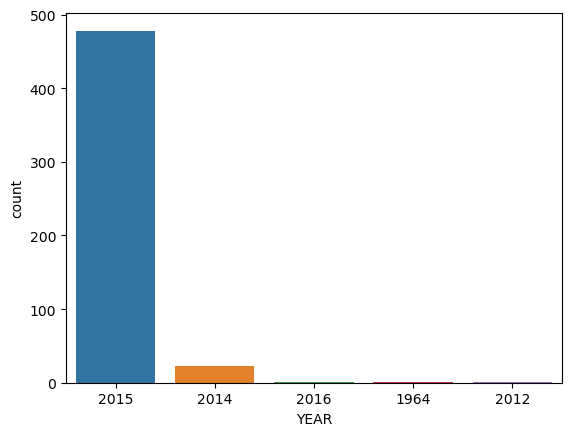

In [69]:
sns.countplot(data = fandango, x = 'YEAR')

**TASK: What are the 10 movies with the highest number of votes?**

In [80]:
fandango.sort_values('VOTES', ascending = False).iloc[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: How many movies have zero votes?**

In [86]:
len(fandango[fandango['VOTES'] == 0])

69

**TASK: Creating DataFrame of only reviewed films by removing any films that have zero votes.**

In [98]:
fandangoNonZeroVotes = fandango[fandango['VOTES'] != 0]
fandangoNonZeroVotes.reset_index()
fandangoNonZeroVotes

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Creating a KDE plot that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

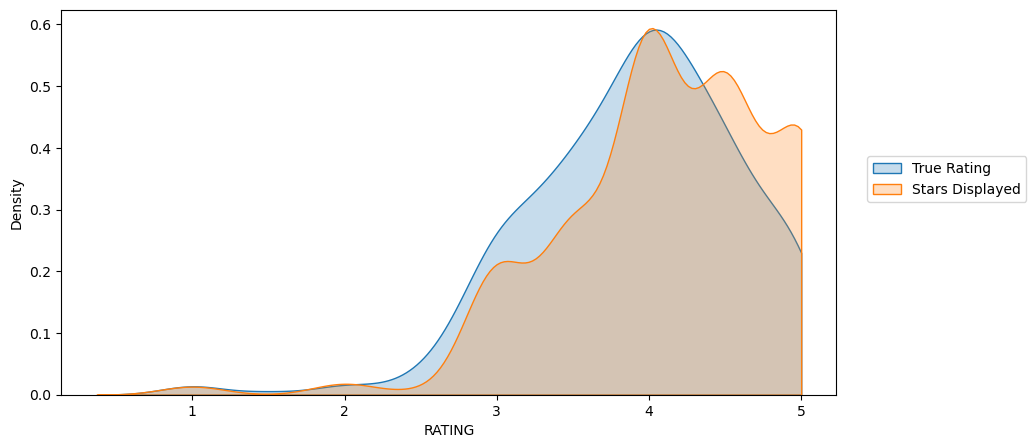

In [150]:
plt.figure(figsize = (10, 5))
sns.kdeplot(data = fandangoNonZeroVotes, x = 'RATING', clip = [0, 5], fill = True, label = 'True Rating')
sns.kdeplot(data = fandangoNonZeroVotes, x = 'STARS', clip = [0, 5], fill = True, label = 'Stars Displayed')
plt.legend(loc = (1.04, 0.5));

**TASK: Let's now actually quantify this discrepancy. I am goint to create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [162]:
fandangoNonZeroVotes.loc[:, 'STARS-RATING'] = round(fandangoNonZeroVotes['STARS'] - fandangoNonZeroVotes['RATING'], 1)
fandangoNonZeroVotes

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**TASK: Creating a count plot to display the number of times a certain difference occurs:**

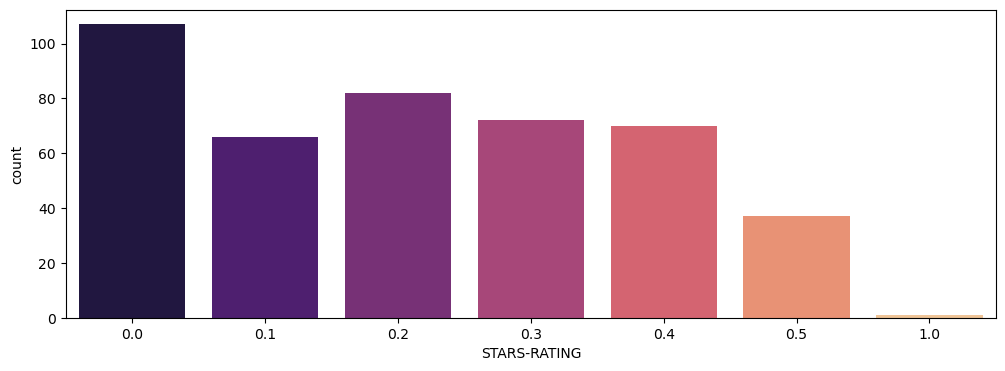

In [166]:
plt.figure(figsize = (12, 4), dpi = 100)
sns.countplot(data = fandangoNonZeroVotes, x = 'STARS-RATING', palette = 'magma');

**TASK: We can see from the plot that a small number of movies displayed a difference of over 1 star from their true rating. Which movies had a differential close to 1 star?**

In [167]:
fandangoNonZeroVotes[fandangoNonZeroVotes['STARS-RATING'] >= 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS-RATING
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparison of Fandango Ratings to Other Sites

LI want to compare the scores from Fandango to other movies sites and see how they compare.

In [2]:
all_sites = pd.read_csv("all_sites_scores.csv")

In [4]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [5]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [6]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**TASK: I am going to create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

<Axes: title={'center': 'RottenTomatoes vs RottenTomatoes_User'}, xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

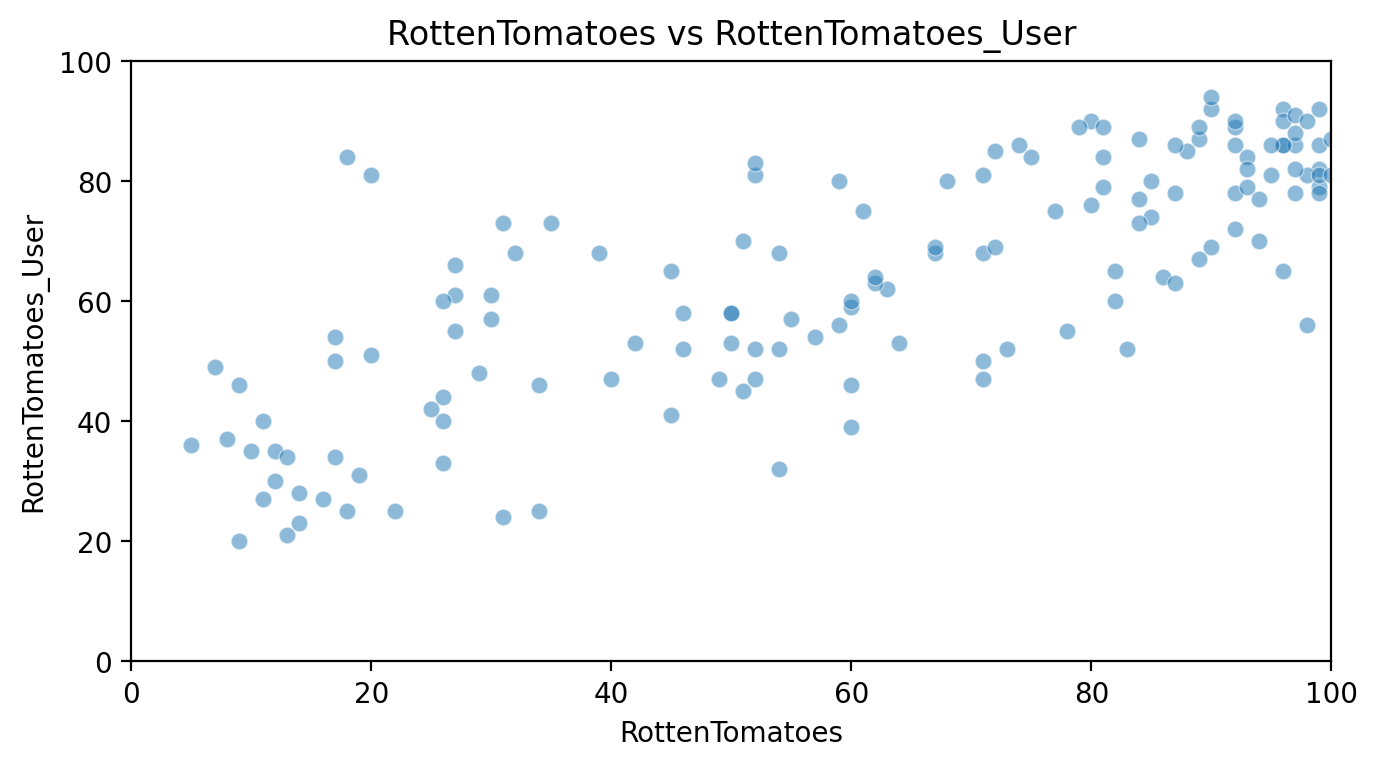

In [29]:
plt.figure(figsize = (12, 6), dpi = 200)
plt.axes([0 ,0, 0.5, 0.5])
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.title('RottenTomatoes vs RottenTomatoes_User')
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User', alpha = 0.5)

Let's quantify this difference by comparing the critics ratings and the RT User ratings. I will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**TASK: I am going to create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [18]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

In [19]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first i am going to take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

In [32]:
round(abs(all_sites['Rotten_Diff']).mean(), 2)

15.1

**TASK: Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot.**

C:\Users\jovan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'RT Critics Score - RT User Score'}, xlabel='Rotten_Diff', ylabel='Count'>

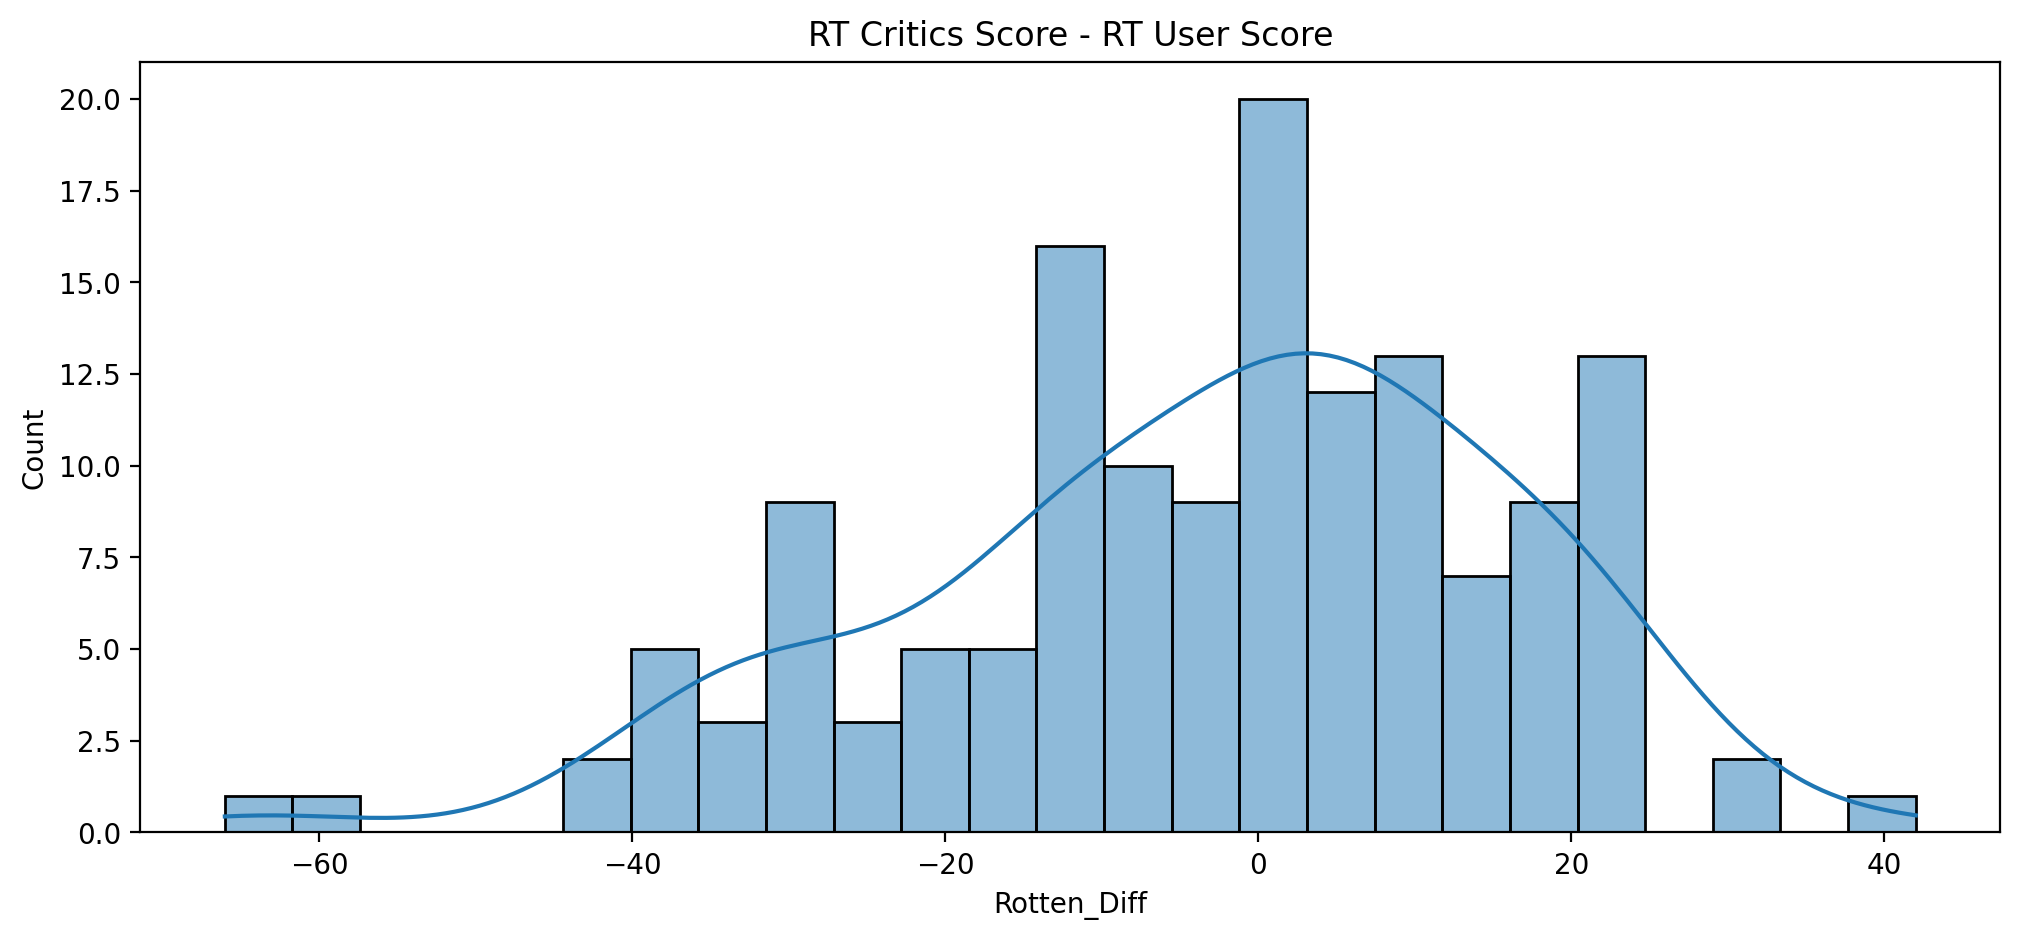

In [28]:
plt.figure(figsize = (12, 5), dpi = 200)
plt.title('RT Critics Score - RT User Score')
sns.histplot(data = all_sites, x = 'Rotten_Diff', kde = True, bins = 25)

**TASK: Now I am going to create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

C:\Users\jovan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


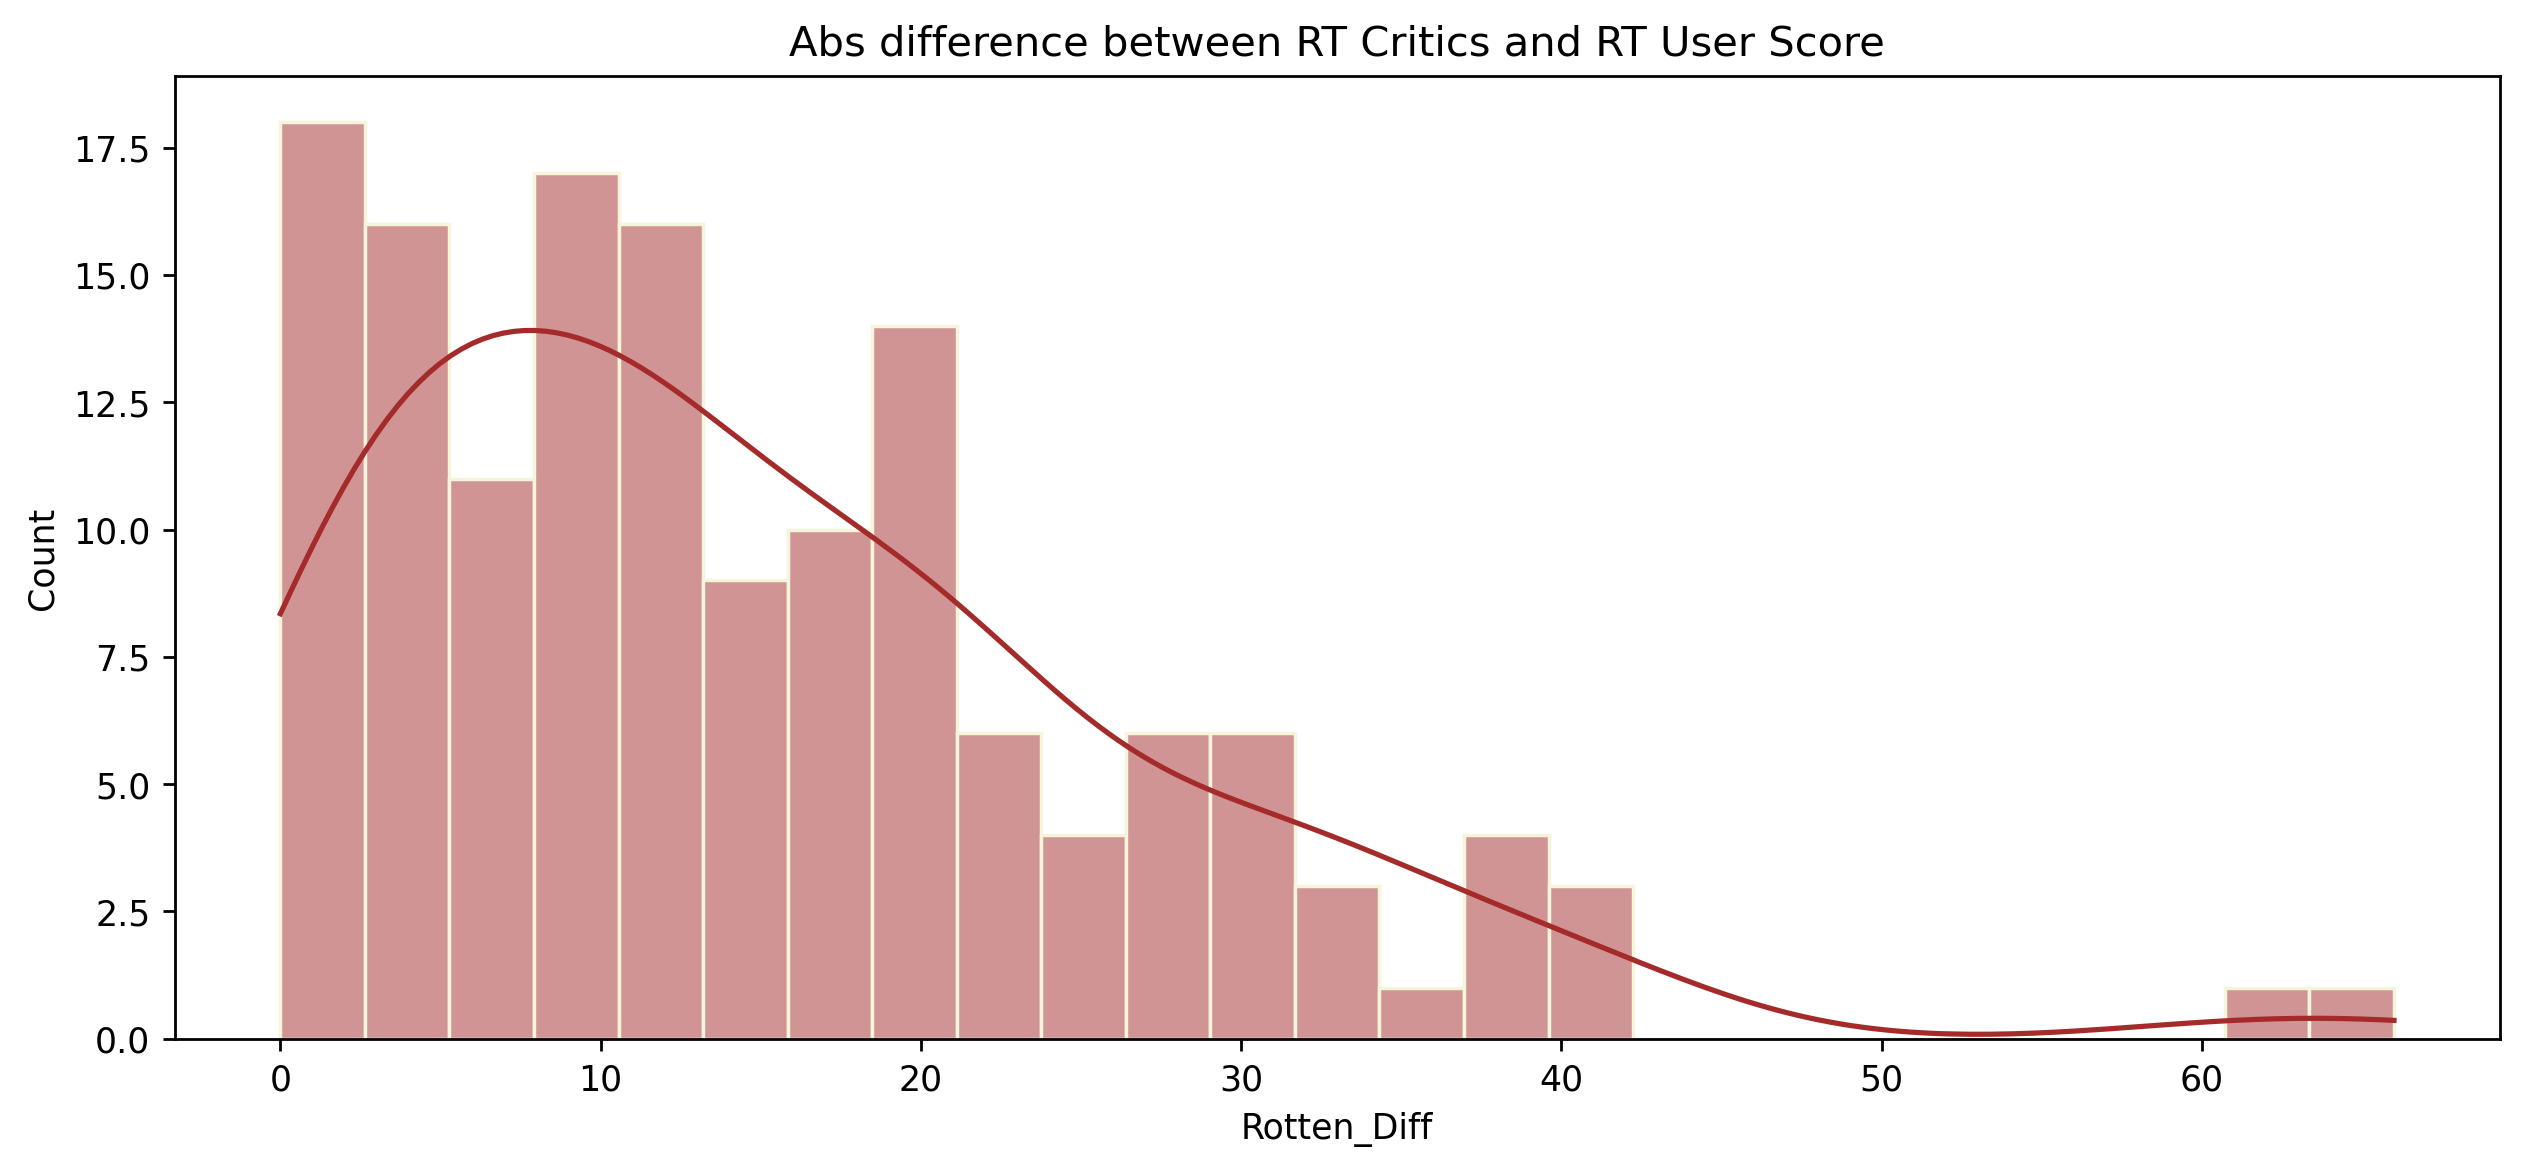

In [50]:
plt.figure(figsize = (12, 5), dpi = 250)
plt.title('Abs difference between RT Critics and RT User Score')
sns.histplot(data = all_sites, x = abs(all_sites['Rotten_Diff']), bins = 25, kde = True, color = 'brown', edgecolor = 'beige');

**Let's find out which movies are causing the largest differences. First, i will show the top 5 movies with the largest *negative* difference between Users and RT critics. Since I calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

In [69]:
all_sites.sort_values('Rotten_Diff', ascending = True)[['FILM', 'Rotten_Diff']].iloc[:5]
#all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**TASK: I am going to display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

In [3]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


<Axes: xlabel='Metacritic', ylabel='Metacritic_User'>

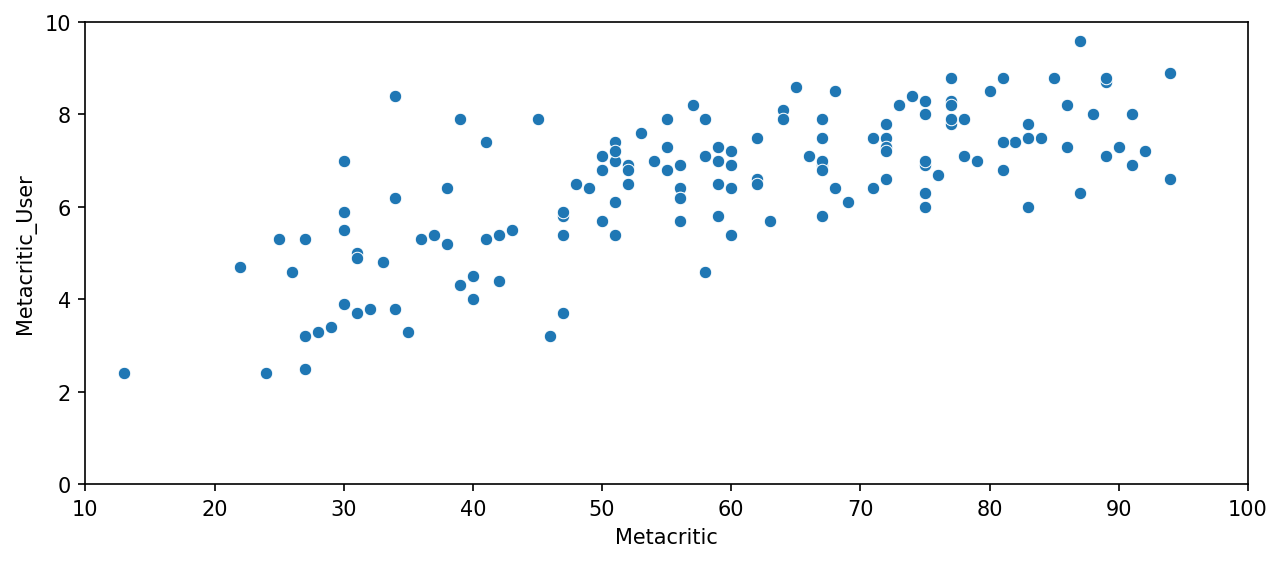

In [36]:
plt.figure(figsize = (10, 4), dpi = 150)
plt.xlim(10, 100)
plt.ylim(0, 10)
sns.scatterplot(data = all_sites, x = 'Metacritic', y = 'Metacritic_User')

## IMBD

Now I will analyze the IMDB by examining its most popular movies.

**TASK: I am going to create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

In [37]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

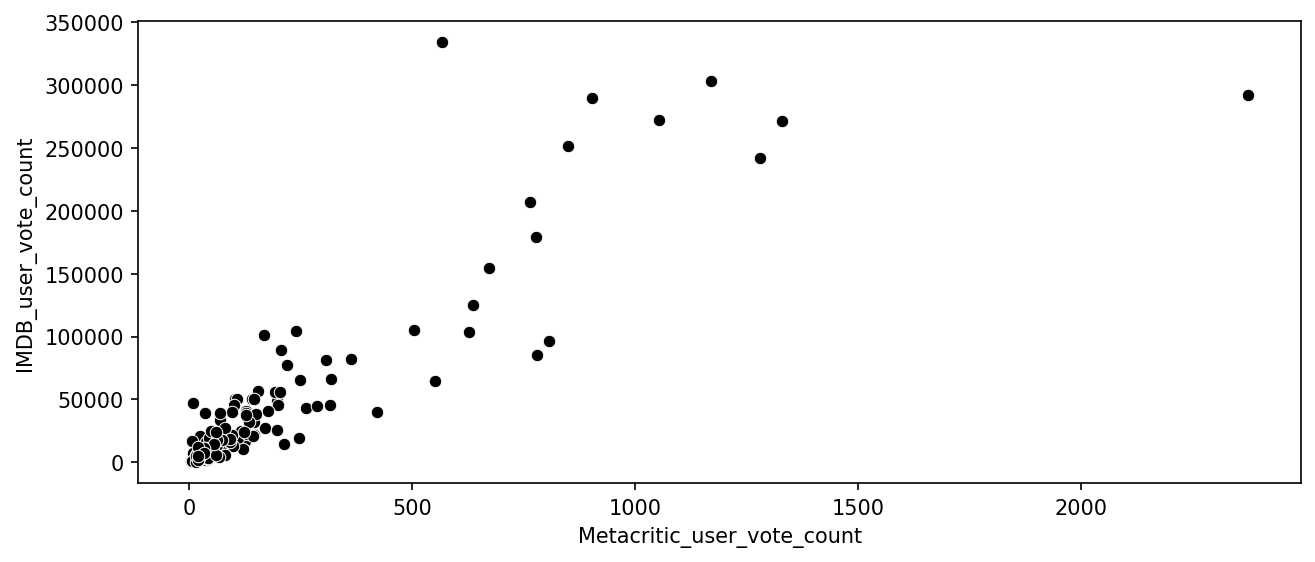

In [52]:
plt.figure(figsize = (10, 4), dpi = 150)
sns.scatterplot(data = all_sites, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count', color = 'black')

**Going to find out which film have the highest amount of votes on IMDB**

In [67]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164


**I want to know how many films have more than 100 000 IMDB votes**

In [57]:
len(all_sites[all_sites['IMDB_user_vote_count'] > 100000])

16

**I displayed those films, in descending order**

In [59]:
all_sites[all_sites['IMDB_user_vote_count'] > 100000].sort_values('IMDB_user_vote_count', ascending = False)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164
65,Birdman (2014),92,78,88,8.0,7.9,1171,303505
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023
74,The Hobbit: The Battle of the Five Armies (2014),61,75,59,7.0,7.5,903,289464
44,Kingsman: The Secret Service (2015),75,84,58,7.9,7.8,1054,272204
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
72,American Sniper (2015),72,85,72,6.6,7.4,850,251856
130,Jurassic World (2015),71,81,59,7.0,7.3,1281,241807
73,Furious 7 (2015),81,84,67,6.8,7.4,764,207211
97,Fifty Shades of Grey (2015),25,42,46,3.2,4.2,778,179506


**I will do the same thing for the Metactiric vote count**

In [69]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023


In [61]:
len(all_sites[all_sites['Metacritic_user_vote_count'] > 500])

17

In [62]:
all_sites[all_sites['Metacritic_user_vote_count'] > 500].sort_values('Metacritic_user_vote_count', ascending = False)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
130,Jurassic World (2015),71,81,59,7.0,7.3,1281,241807
65,Birdman (2014),92,78,88,8.0,7.9,1171,303505
44,Kingsman: The Secret Service (2015),75,84,58,7.9,7.8,1054,272204
74,The Hobbit: The Battle of the Five Armies (2014),61,75,59,7.0,7.5,903,289464
72,American Sniper (2015),72,85,72,6.6,7.4,850,251856
140,Inside Out (2015),98,90,94,8.9,8.6,807,96252
49,Terminator Genisys (2015),26,60,38,6.4,6.9,779,85585
97,Fifty Shades of Grey (2015),25,42,46,3.2,4.2,778,179506
